In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import HuberRegressor
import numpy.random as rgt
from dphuber import huberReg


In [2]:
# Assuming huberReg is your custom class for noisy Huber regression

def l2_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def run_experiment(n, d, repetitions, eta, epsilon, T, delta, epsilon2=None):
    errors_noisy = []
    errors_ordinary = []
    if epsilon2 is not None:
        errors_noisy2 = []
    
    for _ in range(repetitions):
        # Generate sample data
        X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
        truebeta = np.random.normal(0, 1, d)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2, n) +1
        beta0 = np.zeros(d+1)

        # Noisy Huber Regression
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta)
        if epsilon2 is not None:
            noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon2, T=T, delta=delta, eta=eta)
            error_noisy2 = l2_distance(noisy_huber_result2[0][1:], truebeta)
            errors_noisy2.append(error_noisy2)
        error_noisy = l2_distance(noisy_huber_result[0][1:], truebeta)  # Assuming the first return value is the regression result
        errors_noisy.append(error_noisy)

        # Ordinary Huber Regression
        huber_reg = HuberRegressor().fit(X, Y)
        ordinary_huber_coefficients = huber_reg.coef_
        error_ordinary = l2_distance(ordinary_huber_coefficients, truebeta)
        errors_ordinary.append(error_ordinary)
        #error_between = l2_distance(ordinary_huber_coefficients,noisy_huber_result[0][1:])
        #errors_between.append(error_between)
    if epsilon2 is not None:
        return np.mean(errors_noisy),np.mean(errors_noisy2),np.mean(errors_ordinary)
    else:
        return np.mean(errors_noisy), np.mean(errors_ordinary)

## Lowdim

In [ ]:
# Parameters
d = 5
eta = 1
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(2000, 30000, 500))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ordinary = []
mean_errors_noisy2 = []
for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(d), 1/np.sqrt(d), (n, d))
        truebeta = np.random.normal(0, 1, d)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(d+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        # Noisy Huber Regression2
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result2 = noisy_huber_regression.noisy_huber_reg_lowdim(beta0=beta0, epsilon=epsilon2, T=T, delta=delta, eta=eta)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][1:], truebeta))
        #Ordinary Huber
        huber_reg = HuberRegressor().fit(X, Y)
        ordinary_huber_coefficients = huber_reg.coef_
        errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
    mean_errors_ordinary.append(np.mean(errors_ord))


        

In [ ]:
plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
n, d = 1000, 7
X = np.random.randn(n, d)
true_beta = np.zeros(d)
true_beta[:5] = np.random.randn(5)  # Sparse true coefficients
true_beta = true_beta/np.linalg.norm(true_beta)
Y = X.dot(true_beta) + np.random.randn(n)

In [ ]:
reg = huberReg(X,Y)

In [ ]:
eta = 1
delta = 0.001
T=int(np.log(1000))
epsilon = 0.5

# Highdim

In [ ]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy2 = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_huber_regression2 = huberReg(X, Y,intercept=False)
        noisy_huber_result2 = noisy_huber_regression2.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy2, label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('my_plot_high_n01.png', dpi=300)
plt.show()

## comparison with DP-ls

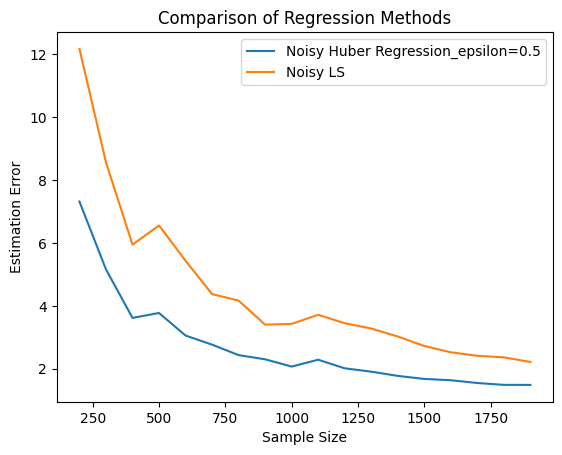

In [9]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy_ls = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy_ls = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_ls = huberReg(X, Y,intercept=False)
        noisy_ls_result = noisy_ls.noisy_ls_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy_ls.append(l2_distance(noisy_ls_result[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy_ls.append(np.mean(errors_noisy_ls))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy_ls, label='Noisy LS')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('my_plot_high_n01_lscomparison.png', dpi=300)
plt.show()

## Heavy tail

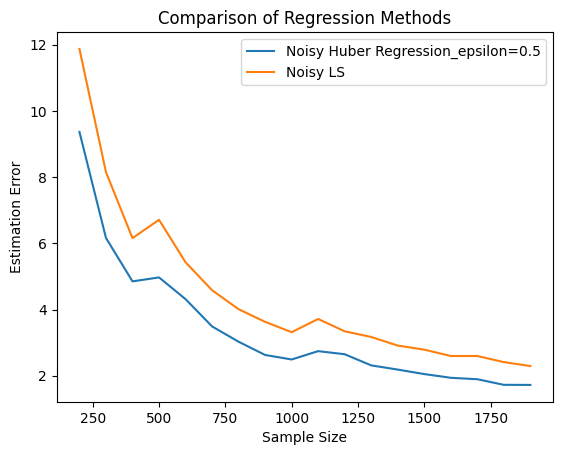

In [10]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy_ls = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy_ls = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(1.5, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_ls = huberReg(X, Y,intercept=False)
        noisy_ls_result = noisy_ls.noisy_ls_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy_ls.append(l2_distance(noisy_ls_result[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy_ls.append(np.mean(errors_noisy_ls))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_noisy_ls, label='Noisy LS')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('my_plot_high_t15.png', dpi=300)
plt.show()

## Comparison with ord huber

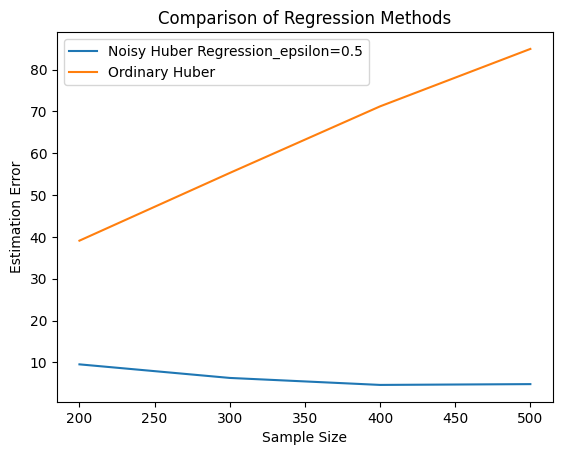

In [7]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 100
sample_sizes = np.array(range(200, 600, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_ord = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:20] = np.random.randn(20)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        Y = X.dot(truebeta) + rgt.standard_t(1.5, n)
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=10/(n**1.1), eta=eta, s=20, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        ord_huber = huberReg(X, Y,intercept=False)
        ord_result = ord_huber.huber_lasso()
        errors_ord.append(l2_distance(ord_result, truebeta))
        
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_ord.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
plt.plot(sample_sizes, mean_errors_ord, label='Ordinary Huber')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
plt.savefig('my_plot_high_t15.png', dpi=300)
plt.show()

In [3]:
n=100
X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
truebeta = np.zeros(n)
truebeta[:20] = np.random.randn(20)
truebeta /= np.linalg.norm(truebeta)
#Y = X.dot(truebeta) + rgt.standard_t(1.5, n)
Y = X.dot(truebeta) +np.random.normal(0, 1, n)

In [4]:
ord_huber = huberReg(X, Y,intercept=False)
beta0 = np.zeros(n)
ord_result = ord_huber.huber_lasso()

In [5]:
ord_result

array([-3.43560199e-04,  1.42088871e+00,  2.22433923e-04,  7.89531057e-03,
       -7.26537991e-02,  2.04302195e+00,  2.93626134e-01, -1.20999041e-04,
        3.14570703e-06,  6.50310159e-04, -1.12124275e-03,  2.48536139e+00,
       -8.86139531e-01, -9.87102719e-05, -1.23781810e-03, -8.40567701e-04,
       -9.63993498e-05, -1.44577457e-01, -1.07078682e+00,  5.10194332e-02,
        4.91839288e-04, -1.94879363e+00,  6.98538998e-01, -2.55170540e+00,
        6.55938548e-04,  3.75070156e-01, -1.98701587e-01,  6.94336055e-02,
       -6.61760793e-05, -3.54937724e-01,  3.97311838e-04, -2.34123213e-04,
        1.48402995e-04, -1.44232296e-03, -2.14086822e+00,  5.16573207e-01,
       -1.36156476e+00,  1.11319659e+00, -2.82695724e-04,  4.62990457e-01,
        1.56693390e+00, -1.47492098e+00,  6.31433500e-02,  1.86692198e-04,
       -1.12833026e+00, -2.96651045e-01,  8.35805143e-05,  2.50859685e-04,
       -1.88693512e-01,  1.98976905e+00,  2.52397097e+00, -1.36785558e+00,
        1.34280241e-04, -

In [6]:
truebeta

array([ 0.19437874,  0.14198987, -0.04927488, -0.06210076, -0.32833999,
        0.47304436,  0.01296161, -0.29783772, -0.50176703,  0.10026502,
       -0.10881337,  0.27676426, -0.04533643,  0.19547034,  0.07486595,
       -0.16519121,  0.04601364, -0.12904023, -0.2407214 , -0.12322048,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
# Parameters
#d = 5
eta = 0.2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(1.5*np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.1
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        #Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=20)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.7
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 1.5
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 2
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 1500, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
#mean_errors_ordinary = []

for n in sample_sizes:
    errors_noisy = []
    errors_ord = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 4, n)+1
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n+1)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=15)
        errors_noisy.append(l2_distance(noisy_huber_result[0][1:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    #mean_errors_ordinary.append(np.mean(errors_ord))
   
    

plt.plot(sample_sizes, np.log(mean_errors_noisy), label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Log Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()

In [ ]:
# Parameters
#d = 5
eta = 0.5
delta = 0.001
#T=10
epsilon = 0.5
epsilon2 = 0.3
repetitions = 50
sample_sizes = np.array(range(200, 2000, 100))  # Adjust sample sizes as needed

# Running the experiment and plotting
mean_errors_noisy = []
mean_errors_noisy2 = []

for n in sample_sizes:
    errors_noisy = []
    errors_noisy2 = []
    T=int(np.log(n))
    for m in range(repetitions):
        X = np.random.uniform(-1/np.sqrt(n), 1/np.sqrt(n), (n, n))
        truebeta = np.zeros(n)
        truebeta[:10] = np.random.randn(10)
        truebeta /= np.linalg.norm(truebeta)
        Y = X.dot(truebeta) + np.random.normal(0, 1, n)
        #Y = X.dot(truebeta) + rgt.standard_t(2.2, n) +1
        beta0 = np.zeros(n)

        # Noisy Huber Regression1
        noisy_huber_regression = huberReg(X, Y,intercept=False)
        noisy_huber_result = noisy_huber_regression.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon, T=T, delta=delta, eta=eta, s=10, 
                                                                           standardize=False)
        errors_noisy.append(l2_distance(noisy_huber_result[0][:], truebeta))

        # Noisy Huber Regression2
        noisy_huber_regression2 = huberReg(X, Y,intercept=False)
        noisy_huber_result2 = noisy_huber_regression2.noisy_huber_reg_highdim(beta0=beta0, epsilon=epsilon2, T=T, delta=delta, eta=eta, s=10, 
                                                                           standardize=False)
        errors_noisy2.append(l2_distance(noisy_huber_result2[0][:], truebeta))
        #Ordinary Huber
        #huber_reg = HuberRegressor().fit(X, Y)
        #ordinary_huber_coefficients = huber_reg.coef_
        #errors_ord.append(l2_distance(ordinary_huber_coefficients, truebeta))
    mean_errors_noisy.append(np.mean(errors_noisy))
    mean_errors_noisy2.append(np.mean(errors_noisy2))
   
    

plt.plot(sample_sizes, mean_errors_noisy, label='Noisy Huber Regression_epsilon=0.5')
#plt.plot(sample_sizes, np.log(mean_errors_noisy2), label='Noisy Huber Regression_epsilon=0.3')
#plt.plot(sample_sizes, np.log(mean_errors_ordinary), label='Ordinary Huber Regression')
#plt.plot(sample_sizes, mean_errors_between, label='error between estimator')
plt.xlabel('Sample Size')
plt.ylabel('Estimation Error')
plt.title('Comparison of Regression Methods')
plt.legend()
#plt.savefig('my_plot_t22.png', dpi=300)
plt.show()